In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports

from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit, train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Transformers 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **LOADING THE DATA**

In [2]:
testDataset = pd.read_csv('test.csv')
trainDataset = pd.read_csv('train.csv')
moviesDataset = pd.read_csv('movies.csv')

# **EDA AND DATA CLEANING**

In [3]:
trainD = trainDataset.copy()

In [4]:
trainD.shape

(162758, 5)

In [5]:
trainD.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [6]:
# Checking datatypes and null values info

trainD.info()

<class 'pandas.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   movieid             162758 non-null  str  
 1   reviewerName        162758 non-null  str  
 2   isFrequentReviewer  162758 non-null  bool 
 3   reviewText          156311 non-null  str  
 4   sentiment           162758 non-null  str  
dtypes: bool(1), str(4)
memory usage: 5.1 MB


In [7]:
# Basic Statistics of Data

trainD.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [8]:
# Checking Duplicates

trainD.duplicated().sum()

np.int64(1118)

In [9]:
trainD['sentiment'][trainD.duplicated()].value_counts()

sentiment
POSITIVE    747
NEGATIVE    371
Name: count, dtype: int64

In [10]:
trainD['sentiment'].value_counts()

sentiment
POSITIVE    108761
NEGATIVE     53997
Name: count, dtype: int64

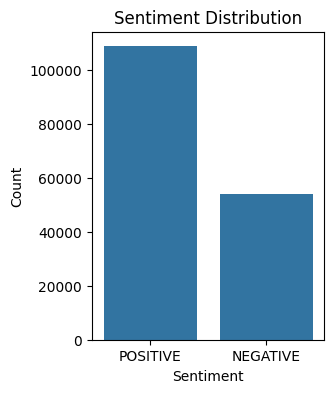

In [11]:
# Label --> Sentiment

fig, axes = plt.subplots(1,1 , figsize=(3, 4))
sns.countplot(x='sentiment', data = trainD)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [12]:
# Checking Missing Values

trainD.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

## **EDA : About Movies Dataset**

In [13]:
moviesD = moviesDataset.copy()

In [14]:
moviesD.shape

(143258, 14)

In [15]:
moviesD.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,25-08-2018,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,11-02-2020,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,23-10-2020,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,27-03-2017,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [16]:
moviesD.info()

<class 'pandas.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  str    
 1   title                 143258 non-null  str    
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   str    
 4   ratingContents        13991 non-null   str    
 5   releaseDateTheaters   30773 non-null   str    
 6   releaseDateStreaming  79420 non-null   str    
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  str    
 9   originalLanguage      129400 non-null  str    
 10  director              143258 non-null  str    
 11  boxOffice             14743 non-null   str    
 12  distributor           23001 non-null   str    
 13  soundType             15917 non-null   str    
dtypes: float64(2), str(12)
memory usage: 15.3 MB


In [17]:
moviesD.describe()

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


In [18]:
moviesD.duplicated().sum()

np.int64(1571)

- Let's remove the duplicate rows from the movies dataset

In [19]:
null_counts = moviesD.isnull().sum(axis=1)
moviesD = moviesD.assign(null_counts = null_counts).sort_values(by='null_counts')

moviesD = moviesD.drop_duplicates(subset=['movieid'],keep='first')
moviesD.drop('null_counts',axis=1,inplace=True)
moviesD.shape

(126404, 14)

In [20]:
moviesD.isnull().sum()

movieid                      0
title                        0
audienceScore            60634
rating                  113275
ratingContents          113275
releaseDateTheaters      97817
releaseDateStreaming     55109
runtimeMinutes           11981
genre                     9608
originalLanguage         11879
director                     0
boxOffice               112380
distributor             104827
soundType               111783
dtype: int64

In [21]:
# Percentage of Null Values in Movies Dataset

missingPercent = (moviesD.isnull().sum()/len(moviesD))* 100
print(missingPercent)

movieid                  0.000000
title                    0.000000
audienceScore           47.968419
rating                  89.613462
ratingContents          89.613462
releaseDateTheaters     77.384418
releaseDateStreaming    43.597513
runtimeMinutes           9.478339
genre                    7.601025
originalLanguage         9.397646
director                 0.000000
boxOffice               88.905414
distributor             82.930129
soundType               88.433119
dtype: float64


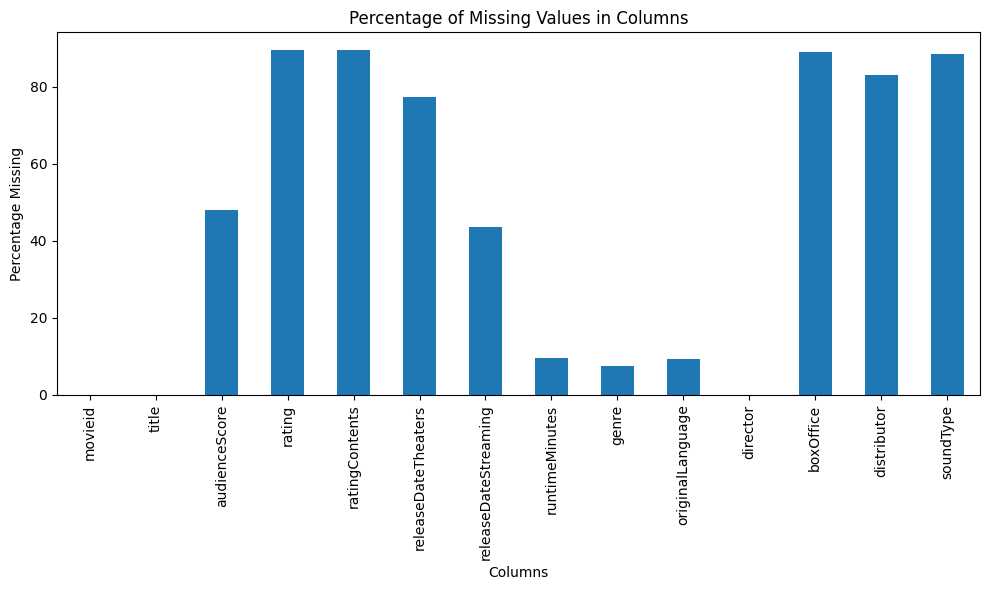

In [22]:
plt.figure(figsize=(10, 6))
missingPercent.plot(kind='bar')
plt.title("Percentage of Missing Values in Columns")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

* Looking at the above values, we can drop `rating`, `ratingContents`, `releaseDateTheaters` , `boxOffice`, `distributor`, `soundType` because most of the values in these columns are null.

In [23]:
# Dropping columns that are not needed

drop_cols = ['rating', 'ratingContents', 'releaseDateTheaters' , 'boxOffice', 'distributor', 'soundType']

moviesD = moviesD.drop(drop_cols, axis=1)

In [24]:
moviesD.head(2)

,movieid,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
64180,frodo_baggins_hannibal_lecter_trinity_captain_...,Frodo Baggins Hannibal Lecter Trinity Captain ...,72.0,19-06-2007,95.0,Documentary,English,Charles Magana
93196,scarlett_o'hara_dorothy_gale_willy_wonka,Scarlett O'Hara Dorothy Gale Willy Wonka,58.0,16-10-2007,115.0,"History, Drama",English,Timothy Forester


* Since `title` and `movieid` are almost same kind of columns, we can remove one of them.

In [25]:
moviesD = moviesD.drop('title', axis = 1)

In [26]:
moviesD.head()

,movieid,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
64180,frodo_baggins_hannibal_lecter_trinity_captain_...,72.0,19-06-2007,95.0,Documentary,English,Charles Magana
93196,scarlett_o'hara_dorothy_gale_willy_wonka,58.0,16-10-2007,115.0,"History, Drama",English,Timothy Forester
35572,james_bond_james_bond_pirate,78.0,07-09-2019,169.0,"Horror, Mystery & thriller",English,Ronald Guzman
35478,the_terminator_escape_john_mcclane_black_widow,77.0,15-05-2001,122.0,Drama,English,Vickie Singh
133211,dorothy_gale_fantastic_norman_bates,86.0,30-04-2013,122.0,"Comedy, Drama, Romance",English,Marilyn Robbins


`releaseDateStreaming` is of Date dtype for which imputation won't make any sense and won't contribute much to the sentiment analysis

In [27]:
moviesD = moviesD.drop('releaseDateStreaming', axis = 1)

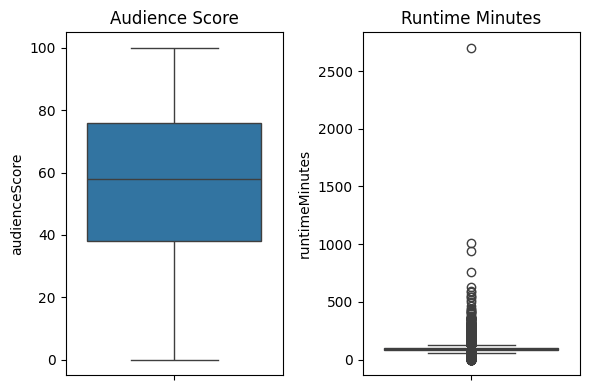

In [28]:
# Checking the distribution of datapoints and checking outliers

fig, axes = plt.subplots(1,2 , figsize=(6, 4))

sns.boxplot(data=moviesD, y='audienceScore',ax=axes[0])
axes[0].set_title('Audience Score')

sns.boxplot(data=moviesD, y='runtimeMinutes',ax=axes[1])
axes[1].set_title('Runtime Minutes')

plt.tight_layout()
plt.show()

* `runTimeMinutes` has so many outliers. We will scale it.

In [29]:
moviesD.columns

Index(['movieid', 'audienceScore', 'runtimeMinutes', 'genre',
       'originalLanguage', 'director'],
      dtype='str')

In [30]:
moviesD.head()

,movieid,audienceScore,runtimeMinutes,genre,originalLanguage,director
64180,frodo_baggins_hannibal_lecter_trinity_captain_...,72.0,95.0,Documentary,English,Charles Magana
93196,scarlett_o'hara_dorothy_gale_willy_wonka,58.0,115.0,"History, Drama",English,Timothy Forester
35572,james_bond_james_bond_pirate,78.0,169.0,"Horror, Mystery & thriller",English,Ronald Guzman
35478,the_terminator_escape_john_mcclane_black_widow,77.0,122.0,Drama,English,Vickie Singh
133211,dorothy_gale_fantastic_norman_bates,86.0,122.0,"Comedy, Drama, Romance",English,Marilyn Robbins


### Data Imputation :
   * impute the `audienceScore` and `runtimeMinutes` by replacing the null values with 
     the mean values
   * replace the missing values of `genre` and `originalLanguage` with the most 
     frequent values occuring in the respective columns

In [31]:
imputeTransformer = ColumnTransformer([
    ('SI_mean', SimpleImputer(strategy = 'mean'), ['audienceScore','runtimeMinutes']),
    ('SI_mostfreq', SimpleImputer(strategy = 'most_frequent'), ['genre', 'originalLanguage'])
], remainder = 'passthrough', verbose_feature_names_out = False)

transformed_features = imputeTransformer.fit_transform(moviesD)

# Changing our imputed array to dataframe for easier processing

columns = imputeTransformer.get_feature_names_out()
moviesD = pd.DataFrame(transformed_features, columns = columns)

# Sanity check for missing/null values

moviesD.isnull().sum()

audienceScore       0
runtimeMinutes      0
genre               0
originalLanguage    0
movieid             0
director            0
dtype: int64

# <u>**DATA MERGING**</u>

In [32]:
# Merging train dataset and movies dataset

train_merged = pd.merge(trainD, moviesD, on='movieid', how='left')

In [33]:
train_merged.shape

(162758, 10)

In [34]:
train_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'audienceScore', 'runtimeMinutes', 'genre',
       'originalLanguage', 'director'],
      dtype='str')

In [35]:
train_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  str   
 1   reviewerName        162758 non-null  str   
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  str   
 4   sentiment           162758 non-null  str   
 5   audienceScore       162758 non-null  object
 6   runtimeMinutes      162758 non-null  object
 7   genre               162758 non-null  str   
 8   originalLanguage    162758 non-null  str   
 9   director            162758 non-null  str   
dtypes: bool(1), object(2), str(7)
memory usage: 11.3+ MB


In [36]:
train_merged.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,runtimeMinutes,genre,originalLanguage,director
count,162758,162758,162758,156311,162758,162758.0,162758.0,162758,162758,162758
unique,16812,4482,2,155071,2,101.0,206.0,1189,88,8828
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE,86.0,90.0,Drama,English,Billy Diaz
freq,708,962,113189,29,108761,3835.0,4754.0,22129,140698,857


In [37]:
# Null Percentage of the Merged Dataset

(train_merged.isnull().sum()/ len(train_merged)) * 100

movieid               0.000000
reviewerName          0.000000
isFrequentReviewer    0.000000
reviewText            3.961096
sentiment             0.000000
audienceScore         0.000000
runtimeMinutes        0.000000
genre                 0.000000
originalLanguage      0.000000
director              0.000000
dtype: float64

In [38]:
train_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'audienceScore', 'runtimeMinutes', 'genre',
       'originalLanguage', 'director'],
      dtype='str')

In [39]:
train_merged['reviewText'] = train_merged['reviewText'].fillna('')

In [40]:
# Dropping duplicate rows from merged dataset

train_merged = train_merged.drop_duplicates(keep='first')

In [41]:
train_merged['director'].value_counts().head()

director
Billy Diaz          836
Michelle Numbers    706
Linda Shuffler      638
Jill Fraser         603
Michele Burton      554
Name: count, dtype: int64

In [42]:
# Processing on Director Column

sorted_directors = train_merged['director'].value_counts().sort_values(ascending=False)

count = 0
selected_directors = []
topDirectors = []

for dirCount, dirName in zip(sorted_directors, sorted_directors.index):
    count += dirCount
    topDirectors.append(dirName)
    selected_directors.append(dirCount)

    if count > 0.55 * len(moviesD):
        break
        
train_merged['topDirector'] = train_merged['director'].isin(topDirectors).astype(int)

In [43]:
train_merged.head(3)

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,runtimeMinutes,genre,originalLanguage,director,topDirector
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,65.0,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,1
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,47.0,119.0,"Holiday, Romance, Comedy, Lgbtq+",English,Hubert Dixon,1
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,80.0,130.0,Drama,English,Bobby Oleary,0


# <u>**DATA PREPROCESSING**</u>

#### `genre` Column

* Step-1 Removing Punctuation Marks
* Step-2 Converting to LowerCase
* Step-3 Getting Unique Genres
* Step-4 Encode it with Custom Function

In [44]:
# Remove commas and ampersands from the genre column and replace them with spaces
train_merged['genre'] = train_merged['genre'].str.replace(',', '').str.replace(' & ', '&')

# converting to lowercase
train_merged['genre'] = train_merged['genre'].str.lower()

''' To get unique genre I'll create a new column with name -- `genres` ''' 

# Split the genre column into separate genres
train_merged['genres'] = train_merged['genre'].str.split()

# Explode the DataFrame to create multiple rows for each genre entry
train_merged_exploded = train_merged.explode('genres', ignore_index=True)

# Strip whitespace from the genre entries
train_merged_exploded['genres'] = train_merged_exploded['genres'].str.strip()

# Get the unique genres
unique_genres = train_merged_exploded['genres'].unique()

print('No. of Genres: ', len(unique_genres))
print(unique_genres)

### Encode it with Custom Function

def is_genre(name, glist):
  if name in glist:
    return 1
  else:
    return 0

genre_dict = {
    name : train_merged['genres'].apply(lambda x: is_genre(name,x)) for name in unique_genres
}

genre_df = pd.DataFrame(genre_dict)

No. of Genres:  33
<StringArray>
[            'comedy',          'animation',          'adventure',
            'fantasy',            'holiday',            'romance',
             'lgbtq+',              'drama',             'action',
   'mystery&thriller',             'sci-fi',              'crime',
        'documentary',        'kids&family',              'music',
            'history',          'biography',             'horror',
                'war',            'musical',              'anime',
            'western',             'sports',              'short',
            'foreign',             'nature',     'sports&fitness',
           'stand-up',               'news',    'health&wellness',
 'faith&spirituality',        'gay&lesbian',            'variety']
Length: 33, dtype: str


In [45]:
''' Merging this dataframe with the feature_data dataframe

    1. drop the genre and genres column
    2. merge genre_df with feature_data '''

# Dropping columns
train_merged.drop(['genre', 'genres'], axis = 1, inplace = True)

# Merging
train_merged = pd.merge(train_merged, genre_df, left_index = True, right_index=True)
print('Shape of Matrix: ',train_merged.shape)

Shape of Matrix:  (161640, 43)


* #### Let us separate the features and our target variable

In [46]:
# making of copy of our merged dataset so as to not lose the original info
mergedTrain = train_merged.copy()

# Changing the datatype of sentiment to int
mergedTrain['sentiment'] = mergedTrain['sentiment'].replace('POSITIVE', 1).replace("NEGATIVE", 0)

* Making a column for weighted genre to deal with it in a better way

In [47]:
print(mergedTrain.columns)

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'audienceScore', 'runtimeMinutes', 'originalLanguage',
       'director', 'topDirector', 'comedy', 'animation', 'adventure',
       'fantasy', 'holiday', 'romance', 'lgbtq+', 'drama', 'action',
       'mystery&thriller', 'sci-fi', 'crime', 'documentary', 'kids&family',
       'music', 'history', 'biography', 'horror', 'war', 'musical', 'anime',
       'western', 'sports', 'short', 'foreign', 'nature', 'sports&fitness',
       'stand-up', 'news', 'health&wellness', 'faith&spirituality',
       'gay&lesbian', 'variety'],
      dtype='str')


In [48]:
mergedTrain['sentiment'] = mergedTrain['sentiment'].astype('category').cat.codes
corrSentiment = mergedTrain.corr(numeric_only=True)['sentiment'].drop('sentiment')

# Calculate the weighted sum for each row based on genre values and correlations

def weighted_genre(row):
    genre_values = row.iloc[9:]  # Select genre columns
    weighted_sum = sum([value * corrSentiment[genre] for genre, value in genre_values.items()])
    return weighted_sum

# Apply the weighted_genre function to each row

mergedTrain['genre_W'] = mergedTrain.apply(weighted_genre, axis=1)

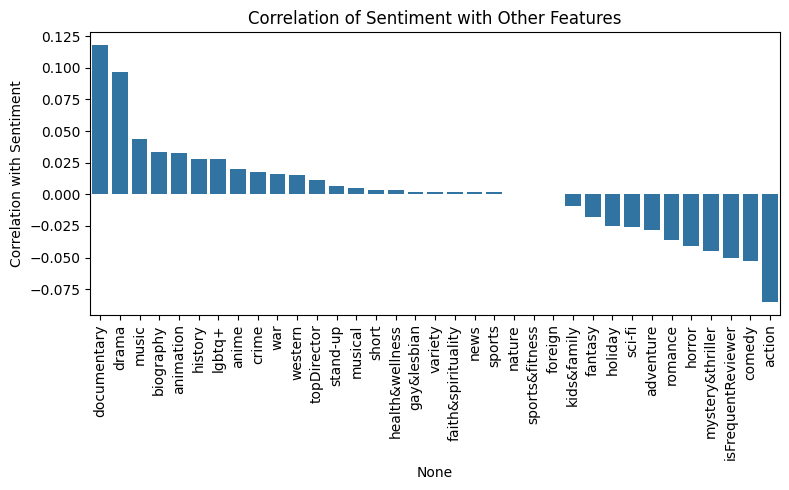

In [49]:
# Create a DataFrame from the correlation coefficients
correlation_df = pd.DataFrame({'Correlation with Sentiment': corrSentiment})
correlation_df = correlation_df.sort_values(by='Correlation with Sentiment', ascending=False)
plt.figure(figsize=(8, 5))

sns.barplot(x = correlation_df.index, y='Correlation with Sentiment', data = correlation_df)
plt.xticks(rotation = 90)

plt.title('Correlation of Sentiment with Other Features')

plt.tight_layout()
plt.show()

In [50]:
mergedTrain['sentiment'].corr(mergedTrain['genre_W'])

np.float64(0.16611929568583245)

In [51]:
train_merged = train_merged.merge(mergedTrain['genre_W'], left_index = True, right_index = True)

In [52]:
train_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'audienceScore', 'runtimeMinutes', 'originalLanguage',
       'director', 'topDirector', 'comedy', 'animation', 'adventure',
       'fantasy', 'holiday', 'romance', 'lgbtq+', 'drama', 'action',
       'mystery&thriller', 'sci-fi', 'crime', 'documentary', 'kids&family',
       'music', 'history', 'biography', 'horror', 'war', 'musical', 'anime',
       'western', 'sports', 'short', 'foreign', 'nature', 'sports&fitness',
       'stand-up', 'news', 'health&wellness', 'faith&spirituality',
       'gay&lesbian', 'variety', 'genre_W'],
      dtype='str')

In [53]:
features = train_merged.drop('sentiment', axis = 1)
label = train_merged['sentiment']

print('Shape of Data Matrix:' , features.shape)
print('Shape of Label Vector:' , label.shape)

Shape of Data Matrix: (161640, 43)
Shape of Label Vector: (161640,)


In [54]:
features.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'audienceScore', 'runtimeMinutes', 'originalLanguage', 'director',
       'topDirector', 'comedy', 'animation', 'adventure', 'fantasy', 'holiday',
       'romance', 'lgbtq+', 'drama', 'action', 'mystery&thriller', 'sci-fi',
       'crime', 'documentary', 'kids&family', 'music', 'history', 'biography',
       'horror', 'war', 'musical', 'anime', 'western', 'sports', 'short',
       'foreign', 'nature', 'sports&fitness', 'stand-up', 'news',
       'health&wellness', 'faith&spirituality', 'gay&lesbian', 'variety',
       'genre_W'],
      dtype='str')

In [55]:
features.drop(['originalLanguage', 'director'], axis = 1, inplace = True)
features.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'audienceScore', 'runtimeMinutes', 'topDirector', 'comedy', 'animation',
       'adventure', 'fantasy', 'holiday', 'romance', 'lgbtq+', 'drama',
       'action', 'mystery&thriller', 'sci-fi', 'crime', 'documentary',
       'kids&family', 'music', 'history', 'biography', 'horror', 'war',
       'musical', 'anime', 'western', 'sports', 'short', 'foreign', 'nature',
       'sports&fitness', 'stand-up', 'news', 'health&wellness',
       'faith&spirituality', 'gay&lesbian', 'variety', 'genre_W'],
      dtype='str')

In [56]:
features.drop(features.columns[7:-1], axis = 1, inplace = True)

In [57]:
# Converting to int format for transforming purposes

features['isFrequentReviewer'] = features['isFrequentReviewer'].astype(int)

In [58]:
features.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
audienceScore         0
runtimeMinutes        0
topDirector           0
genre_W               0
dtype: int64

### Train-Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, shuffle = True, stratify = label, random_state = 16)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(129312, 8) (129312,)
(32328, 8) (32328,)


### Feature Scaling and Encoding

* For Categorical columns we will proceed with encoding and we will scale the numerical columns

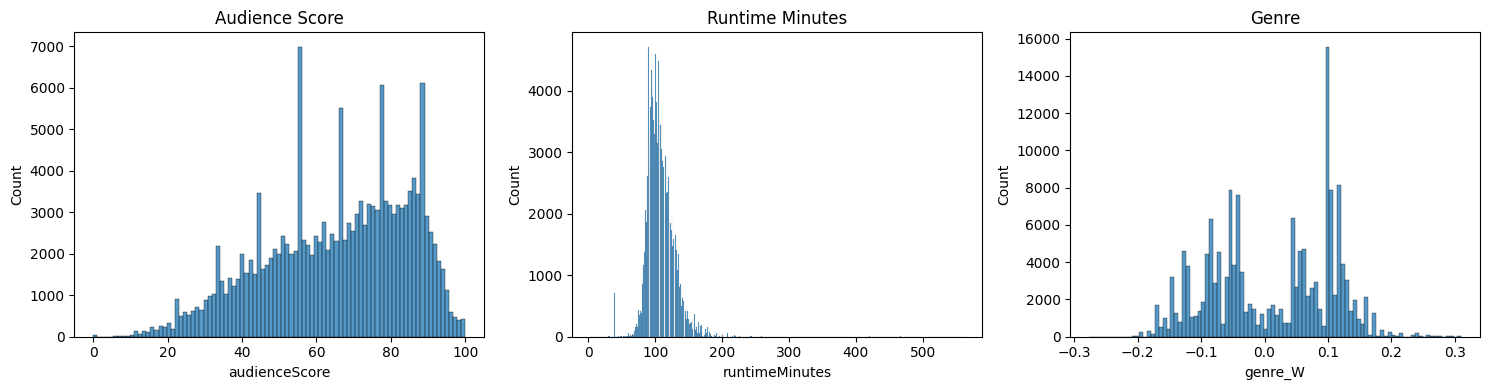

In [60]:
# Plotting Bar Chart to check the distribution of audienceScore so as to choose the best scaling technique

fig, axes = plt.subplots(1,3 , figsize=(15, 4))

sns.histplot(data = features, x='audienceScore',ax=axes[0])
axes[0].set_title('Audience Score')

sns.histplot(data = features, x='runtimeMinutes',ax=axes[1])
axes[1].set_title('Runtime Minutes')

sns.histplot(data = features, x='genre_W',ax=axes[2])
axes[2].set_title('Genre')

plt.tight_layout()
plt.show()

#### <u>**Complete Data**</u>

In [61]:
# Scaling and Encoding

dataTransformer1 = ColumnTransformer([
    ('vect_movie' , TfidfVectorizer() , 'movieid'),
    ('vect_reviewer' , TfidfVectorizer() , 'reviewerName'),
    ('scaling', MinMaxScaler(), ['audienceScore','runtimeMinutes','genre_W']),
    ('vectorize' , TfidfVectorizer(ngram_range = (1,3), min_df = 4 , max_df =0.4) , 'reviewText')
],remainder = 'passthrough')

training_features = dataTransformer1.fit_transform(features)

print(training_features.shape)

(161640, 217918)


#### <u>**Splitted Data**</u>

In [62]:
# Scaling and Encoding

dataTransformer2 = ColumnTransformer([
    ('vect_movie' , TfidfVectorizer() , 'movieid'),
    ('vect_reviewer' , TfidfVectorizer() , 'reviewerName'),
    ('scaling', MinMaxScaler(), ['audienceScore','runtimeMinutes','genre_W']),
    ('vectorize' , TfidfVectorizer(ngram_range = (1,3), min_df = 4 , max_df =0.4) , 'reviewText')
],remainder = 'passthrough')

trans_X = dataTransformer2.fit_transform(X_train)

print(trans_X.shape)

(129312, 180241)


# <u>**TRANSFORMING VALIDATION SET**</u>

In [63]:
# Encoding and Scaling rest of the columns
validation_features = dataTransformer2.transform(X_test)

print('Shape of Validation Features:' , validation_features.shape)

Shape of Validation Features: (32328, 180241)


# <u>**MODEL-1 LOGISTIC REGRESSION**</u>

## Model Training

#### <u>**Complete Data**</u>

In [64]:
logRegModel = LogisticRegression(max_iter = 500, solver = 'saga', C = 10000, tol = 0.02, random_state = 16)
logRegModel.fit(training_features, label)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",10000
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.02
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",16
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

* Cross Validation Score

In [65]:
response = LabelEncoder().fit_transform(label)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state = 16)

logReg_results = cross_validate(logRegModel, training_features, response, scoring = 'f1_macro', cv = split, n_jobs = -1, return_train_score = True)

pd.DataFrame(logReg_results)

,fit_time,score_time,test_score,train_score
0,4.271062,0.012578,0.812797,0.953611
1,4.002535,0.035817,0.810429,0.949403
2,4.338036,0.010966,0.812228,0.953182
3,4.055836,0.011460,0.811675,0.949744
4,4.326721,0.010569,0.812644,0.953700


#### <u>**Splitted Data**</u>

In [66]:
logRegModel2 = LogisticRegression(max_iter = 500, C = 10000, solver = 'saga', tol = 0.02, random_state = 16)
logRegModel2.fit(trans_X, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",10000
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.02
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",16
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

* Confusion Matrix and Classfication Report

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.71      0.74     10725
    POSITIVE       0.86      0.90      0.88     21603

    accuracy                           0.84     32328
   macro avg       0.82      0.81      0.81     32328
weighted avg       0.84      0.84      0.84     32328



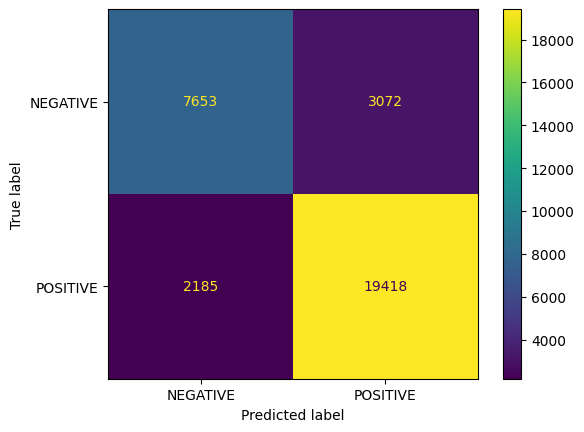

In [67]:
prediction = logRegModel2.predict(validation_features)

print(classification_report(y_test, prediction))

print(ConfusionMatrixDisplay.from_estimator(logRegModel2, validation_features, y_test))
plt.show()

* Precision-Recall Curve

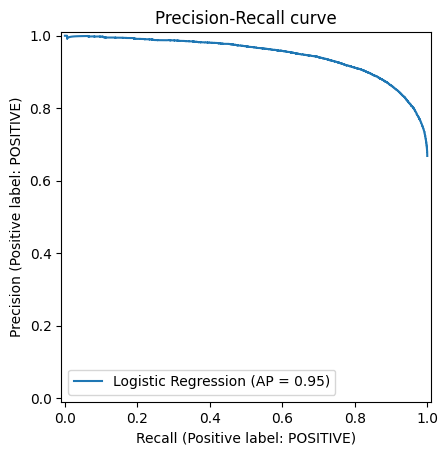

In [68]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(logRegModel2, validation_features, y_test, name="Logistic Regression")
_ = display.ax_.set_title("Precision-Recall curve")

* ### HyperParameter Tuning

In [69]:
encoded_label = LabelEncoder().fit_transform(label)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state = 16)

param_grid = [
    {
        'max_iter': [500, 1000],                     #2
        'C': [5000, 10000],                          #2                 
        'solver': ['saga'],                          #1               
        'tol' : [0.02 , 0.01]                        #2
    }  
]

gslogit = GridSearchCV(LogisticRegression(), 
                       param_grid = param_grid, 
                       cv = split, 
                       scoring = 'f1_macro', 
                       verbose = True, 
                       n_jobs= -1, 
                       return_train_score = True)

In [70]:
gslogit.fit(training_features, encoded_label)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'C': [5000, 10000], 'max_iter': [500, 1000], 'solver': ['saga'], 'tol': [0.02, 0.01]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate

In [71]:
print(gslogit.best_params_)
print(gslogit.best_score_)

{'C': 5000, 'max_iter': 500, 'solver': 'saga', 'tol': 0.02}
0.8124493823880039


In [72]:
results = pd.DataFrame(gslogit.cv_results_)
results[results['rank_test_score'] == 1].loc[: , ['params', 'mean_test_score', 'mean_train_score']]

,params,mean_test_score,mean_train_score
0,"{'C': 5000, 'max_iter': 500, 'solver': 'saga',...",0.812449,0.950218


# <u>**MODEL-2 NAIVE BAYES CLASSIFIER**</u>

## Model Training

#### <u>**Complete Data**</u>

In [73]:
naiveModel = MultinomialNB(alpha = 0.25, force_alpha = True, fit_prior = True, class_prior = [0.42, 0.58])
naiveModel.fit(training_features, label)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",0.25
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.","[0.42, 0.58]"


* Cross Validation Score

In [74]:
response = LabelEncoder().fit_transform(label)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=16)

naive_results = cross_validate(naiveModel, training_features, response, scoring = 'f1_macro', cv = split, n_jobs = -1, return_train_score = True)

pd.DataFrame(naive_results)

,fit_time,score_time,test_score,train_score
0,0.226313,0.027900,0.797305,0.896377
1,0.213049,0.037194,0.798491,0.896459
2,0.226940,0.025142,0.798278,0.897011
3,0.217108,0.029945,0.797425,0.896319
4,0.217039,0.026287,0.799692,0.896346


#### <u>**Splitted Data**</u>

In [75]:
naiveModel2 = MultinomialNB(alpha = 0.25, force_alpha = True, fit_prior = True, class_prior = [0.4, 0.6])
naiveModel2.fit(trans_X, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",0.25
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.","[0.4, 0.6]"


* Confusion Matrix and Classification Report

              precision    recall  f1-score   support

    NEGATIVE       0.73      0.73      0.73     10725
    POSITIVE       0.87      0.86      0.86     21603

    accuracy                           0.82     32328
   macro avg       0.80      0.80      0.80     32328
weighted avg       0.82      0.82      0.82     32328



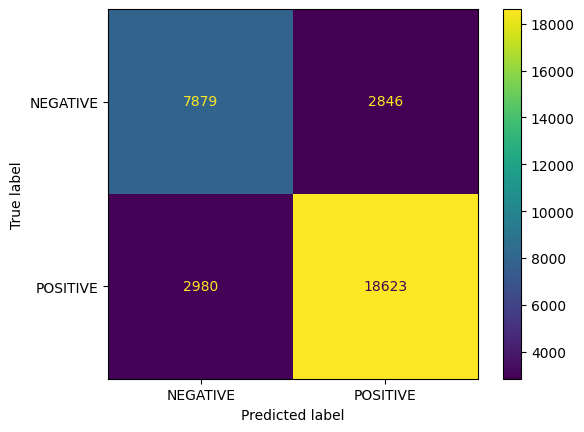

In [76]:
prediction = naiveModel2.predict(validation_features)

print(classification_report(y_test, prediction))

print(ConfusionMatrixDisplay.from_estimator(naiveModel2, validation_features, y_test))
plt.show()

* Precision-Recall Curve

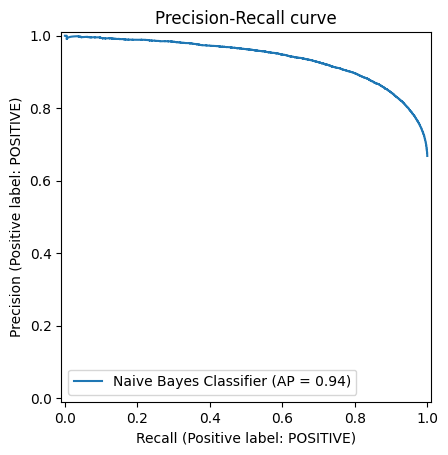

In [77]:
display = PrecisionRecallDisplay.from_estimator(naiveModel2, validation_features, y_test, name="Naive Bayes Classifier")
_ = display.ax_.set_title("Precision-Recall curve")

* ### HyperParameter Tuning

In [78]:
encoded_label = LabelEncoder().fit_transform(label)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=16)

param_grid = [
    {
        'alpha' : [0.1, 0.15, 0.2, 0.25],
        'force_alpha' : [True, False],
        'fit_prior' : [True, False],
        'class_prior' : [None, [0.42, 0.58], [0.4, 0.6]]
    }
]

gsNaive = GridSearchCV(MultinomialNB(),
                       param_grid = param_grid,
                       cv = split,
                       scoring = 'f1_macro',
                       verbose = True,
                       n_jobs= -1,
                       return_train_score = True)

gsNaive.fit(training_features, encoded_label)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",MultinomialNB()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'alpha': [0.1, 0.15, ...], 'class_prior': [None, [0.42, 0.58], ...], 'fit_prior': [True, False], 'force_alpha': [True, False]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time f

In [79]:
print(gsNaive.best_params_)
print(gsNaive.best_score_)

{'alpha': 0.25, 'class_prior': [0.4, 0.6], 'fit_prior': True, 'force_alpha': True}
0.7986956178754845


In [80]:
naive_results = pd.DataFrame(gsNaive.cv_results_)
naive_results[naive_results['rank_test_score'] == 1].loc[: , ['params', 'mean_test_score', 'mean_train_score']]

,params,mean_test_score,mean_train_score
44,"{'alpha': 0.25, 'class_prior': [0.4, 0.6], 'fi...",0.798696,0.897458
45,"{'alpha': 0.25, 'class_prior': [0.4, 0.6], 'fi...",0.798696,0.897458
46,"{'alpha': 0.25, 'class_prior': [0.4, 0.6], 'fi...",0.798696,0.897458
47,"{'alpha': 0.25, 'class_prior': [0.4, 0.6], 'fi...",0.798696,0.897458


# <u>**MODEL-3 LINEAR SVC**</u>

## Model Training

#### <u>**Complete Data**</u>

In [81]:
lsvcModel = LinearSVC(max_iter = 500, tol = 0.005, C = 0.2, random_state = 16)

lsvcModel.fit(training_features, label)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.005
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.2
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rando

* Cross Validation Score

In [82]:
response = LabelEncoder().fit_transform(label)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=16)

lsvc_results = cross_validate(lsvcModel, training_features, response, scoring = 'f1_macro', cv = split, n_jobs = -1, return_train_score = True)

pd.DataFrame(lsvc_results)

,fit_time,score_time,test_score,train_score
0,2.906159,0.018804,0.812272,0.931028
1,3.017652,0.018551,0.811632,0.930873
2,3.042603,0.014824,0.812167,0.931069
3,2.966261,0.023114,0.810005,0.930271
4,2.903759,0.019832,0.811421,0.931189


#### <u>**Splitted Data**</u>

In [83]:
lsvcModel2 = LinearSVC(max_iter = 500, tol = 0.005, C = 0.2, random_state = 16)

lsvcModel2.fit(trans_X, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.005
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.2
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rando

* Confusion Matrix and Classification Report

              precision    recall  f1-score   support

    NEGATIVE       0.79      0.70      0.74     10725
    POSITIVE       0.86      0.91      0.88     21603

    accuracy                           0.84     32328
   macro avg       0.83      0.80      0.81     32328
weighted avg       0.84      0.84      0.84     32328



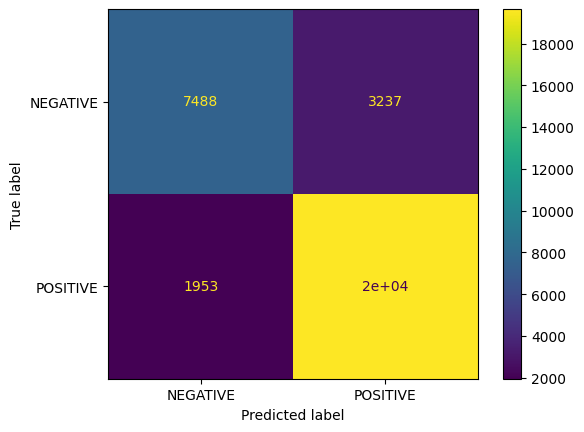

In [84]:
prediction = lsvcModel2.predict(validation_features)

print(classification_report(y_test, prediction))

print(ConfusionMatrixDisplay.from_estimator(lsvcModel2, validation_features, y_test))
plt.show()

* Precision-Recall Curve

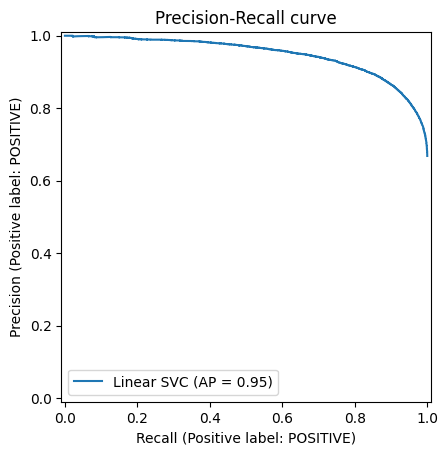

In [85]:
display = PrecisionRecallDisplay.from_estimator(lsvcModel2, validation_features, y_test, name="Linear SVC")
_ = display.ax_.set_title("Precision-Recall curve")

* ### HyperParameter Tuning

In [86]:
response = LabelEncoder().fit_transform(label)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = [
    {
        'max_iter': [500, 1000],                                                 
        'C': [0.1, 0.15, 0.2],                      
        'tol' : [0.0005, 0.001, 0.003, 0.005]                            
    }  
]

gsLSVC = GridSearchCV(LinearSVC(), 
                      param_grid = param_grid, 
                      cv = split, 
                      scoring = 'f1_macro', 
                      verbose = True, 
                      n_jobs= -1, 
                      return_train_score = True)

In [87]:
gsLSVC.fit(training_features, response)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LinearSVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'C': [0.1, 0.15, ...], 'max_iter': [500, 1000], 'tol': [0.0005, 0.001, ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2

In [88]:
print(gsLSVC.best_params_)
print(gsLSVC.best_score_)

{'C': 0.2, 'max_iter': 500, 'tol': 0.001}
0.810825518247128


In [89]:
results = pd.DataFrame(gsLSVC.cv_results_)
results[results['rank_test_score'] == 1].loc[: , ['params', 'mean_test_score', 'mean_train_score']]

,params,mean_test_score,mean_train_score
17,"{'C': 0.2, 'max_iter': 500, 'tol': 0.001}",0.810826,0.931014
21,"{'C': 0.2, 'max_iter': 1000, 'tol': 0.001}",0.810826,0.931010


# <u>**TEST DATA SET**</u>

In [90]:
print(testDataset.columns)
print(moviesD.columns)

Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText'], dtype='str')
Index(['audienceScore', 'runtimeMinutes', 'genre', 'originalLanguage',
       'movieid', 'director'],
      dtype='str')


In [91]:
# CHECKING ACCURACY ON TEST DATA

# first we will merge movies and test dataset

test_merged = pd.merge(testDataset, moviesD, on='movieid', how='left')

print(test_merged.columns)

Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText', 'audienceScore',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director'],
      dtype='str')


In [92]:
test_merged.rename(columns = {'isTopCritic' : 'isFrequentReviewer'}, inplace = True)

In [93]:
test_merged['isFrequentReviewer'] = test_merged['isFrequentReviewer'].astype(int)

In [94]:
print(test_merged.isnull().sum())

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            2510
audienceScore            0
runtimeMinutes           0
genre                    0
originalLanguage         0
director                 0
dtype: int64


* ### Transforming the Test DataSet

In [95]:
# removing null values

test_merged['reviewText'] = test_merged['reviewText'].fillna('')

In [96]:
test_merged['topDirector'] = test_merged['director'].isin(topDirectors).astype(int)

In [97]:
test_merged.drop([ 'originalLanguage', 'director'], axis = 1, inplace = True)

In [98]:
test_merged.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
audienceScore         0
runtimeMinutes        0
genre                 0
topDirector           0
dtype: int64

* Encoding genre

In [99]:
# transform genre column

# Remove commas and ampersands from the genre column and replace them with spaces
test_merged['genre'] = test_merged['genre'].str.replace(',', '').str.replace(' & ', '&')

# converting to lowercase
test_merged['genre'] = test_merged['genre'].str.lower()

''' To get unique genre I'll create a new column with name -- `genres` ''' 

# dealing with null values
#train_merged['genre'] = train_merged['genre'].fillna('')

# Split the genre column into separate genres
test_merged['genres'] = test_merged['genre'].str.split()

# Explode the DataFrame to create multiple rows for each genre entry
test_merged_exploded = test_merged.explode('genres', ignore_index=True)

# Strip whitespace from the genre entries
test_merged_exploded['genres'] = test_merged_exploded['genres'].str.strip()

# Get the unique genres
unique_genres_test = test_merged_exploded['genres'].unique()

print('No. of Genres: ', len(unique_genres_test))

### Encode it with Custom Function

def is_genre(name, glist):
  if name in glist:
    return 1
  else:
    return 0

genre_dict_test = {
    name : test_merged['genres'].apply(lambda x: is_genre(name,x)) for name in unique_genres_test
}

genre_test = pd.DataFrame(genre_dict_test)


# dropping genre and genres columns
test_merged.drop(['genre', 'genres'], axis = 1, inplace = True)

# merging
test_merged = pd.merge(test_merged, genre_test, left_index = True, right_index=True)
print('Shape of Test matrix :' , test_merged.shape)

No. of Genres:  33
Shape of Test matrix : (55315, 40)


In [108]:
corrSentiment = mergedTrain.corr(numeric_only=True)['sentiment']

# Extract the correlations as weights for columns from the 3rd to second last column
colWeights = corrSentiment.iloc[3:-1]

# Calculate the weighted genre column in test_merged using the column weights
common_cols = test_merged.columns.intersection(colWeights.index)
test_merged['genre_w'] = (test_merged[common_cols] * colWeights[common_cols]).sum(axis=1)


In [101]:
test_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'audienceScore', 'runtimeMinutes', 'topDirector', 'holiday', 'horror',
       'mystery&thriller', 'drama', 'adventure', 'musical', 'comedy', 'lgbtq+',
       'crime', 'sci-fi', 'action', 'fantasy', 'documentary', 'war', 'romance',
       'history', 'western', 'kids&family', 'animation', 'stand-up',
       'biography', 'music', 'anime', 'foreign', 'short', 'sports', 'news',
       'health&wellness', 'nature', 'sports&fitness', 'variety', 'gay&lesbian',
       'faith&spirituality'],
      dtype='str')

In [102]:
test_merged = test_merged.drop(test_merged.columns[7:-1], axis=1)

In [103]:
test_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'audienceScore', 'runtimeMinutes', 'topDirector', 'faith&spirituality'],
      dtype='str')

In [104]:
test_merged.head(2)

,movieid,reviewerName,isFrequentReviewer,reviewText,audienceScore,runtimeMinutes,topDirector,faith&spirituality
0,legend_marty_mcfly_oracle,John Kim,0,Green slowly cranks up the dread with style an...,57.0,111.0,1,0
1,terminator_katniss_everdeen_glimmer,Brian Chaney,0,Philip Noyce's direction is elegant and unforc...,86.0,94.0,1,0


In [110]:
common_cols = test_merged.columns.intersection(colWeights.index)
test_merged['genre_w'] = (test_merged[common_cols] * colWeights[common_cols]).sum(axis=1)


In [112]:
# align test columns with training columns
test_merged = test_merged.reindex(columns=mergedTrain.columns, fill_value=0)


In [113]:
test_features = dataTransformer1.transform(test_merged)

In [114]:
# checking number of features in training data and test data are same or not

test_features.shape[1] == training_features.shape[1]

True